<a href="https://colab.research.google.com/github/Firojpaudel/Machine-Learning-Notes/blob/main/Practical%20Deep%20Learning%20For%20Coders/Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training a State-of-the-Art Model

This notebook explores advanced techniques for training an image classification model. We will use the **Imagenette dataset** and progressively apply methods to achieve state-of-the-art results.  

## **Objectives**:

- Understand the challenges of training from scratch.
- Learn about techniques like normalization, Mixup, progressive resizing, and Test Time Augmentation (TTA).
- Prototype and evaluate models using a simplified ImageNet subset: **Imagenette**.

---

### **1. Introduction to Imagenette**

#### Qn1. Why Imagenette?


Imagenette is a subset of ImageNet with 10 very distinct categories. It was designed to:  
- Enable quick experimentation while retaining real-world complexities.  
- Serve as a middle ground between small datasets like MNIST/CIFAR10 and large datasets like ImageNet.  


#### Qn2. Its Benefits?


- **Fast Prototyping**: Reduced dataset size allows iteration within minutes, enabling quicker testing and refinement of ideas.  
- **Real-World Insights**: Imagenette retains enough complexity to provide insights that generalize well to larger datasets like ImageNet.  
- **Resource Efficiency**: Enables meaningful experimentation without requiring expensive computational resources.

#### Key Takeaway:

_The dataset you are given is not always ideal for prototyping._  
To maximize efficiency:
- Reduce dataset size for faster experimentation.
- Iterate quickly to test and refine ideas.  
---

In [1]:
### Setting up the notebook
##@ Notebook initialization
%reload_ext autoreload
%autoreload 2
%matplotlib inline

##@ Installing dependencies
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

##@ Importing the necessary libraries
from fastbook import *
from fastai.callback.fp16 import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Mounted at /content/gdrive


### **2. Preparing the Data**

In [2]:
'''
  After the Notebook is setup, preparing the Imagenette Dataset
'''
path = untar_data(URLs.IMAGENETTE)

We'll use the **DataBlock API** to preprocess the images and create a `DataLoaders` object.  


#### Key Steps:


1. **Presizing**: Resize images to 460 pixels to improve data augmentation.  
2. **Augmentations**: Apply standard augmentations (introduced in Chapter 5).  
3. **Batch Transformations**: Resize images to 224 pixels for training.  
---

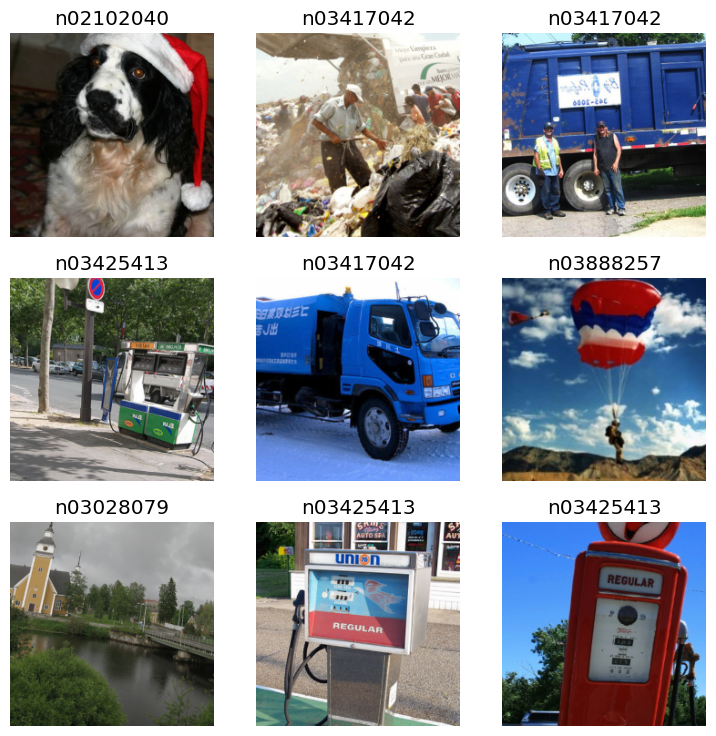

In [3]:
##@ Creating DataBlock and DataLoaders
dblock = DataBlock(
    blocks=(ImageBlock(), CategoryBlock()),  # Image inputs and categorical labels
    get_items=get_image_files,  # Retrieve image files
    get_y=parent_label,  # Use parent folder name as label
    item_tfms=Resize(460),  # Resize images to 460 pixels
    batch_tfms=aug_transforms(size=224, min_scale=0.75)  # Apply augmentations
)

dls = dblock.dataloaders(path, bs=64)  # Create DataLoaders with batch size 64
dls.show_batch()  # Display a batch of images


### **3. Training a Baseline Model**




We will train a baseline model without using pretrained weights. This will serve as a reference point for later comparisons.


#### Model Architecture:


<ul><code>xResNet50</code>: A modified ResNet50 architecture designed for fastai.  </ul>

##### Steps:
1. Create a model using `xResNet50`.
2. Use the **CrossEntropyLoss** for multi-class classification.
3. Measure accuracy as the evaluation metric.
4. Train the model for 5 epochs using the **1-cycle policy**.
---

In [4]:
##@ Baseline Training
model = xresnet50()  # Define the model
learn = Learner(
    dls, model,
    loss_func=CrossEntropyLossFlat(),
    metrics=accuracy  # Use accuracy as the evaluation metric
)

learn.fit_one_cycle(5, 3e-3)  # Train the model for 5 epochs

epoch,train_loss,valid_loss,accuracy,time
0,1.597536,2.334173,0.450336,02:44
1,1.252488,1.807288,0.479089,02:38
2,0.961330,0.978492,0.705377,02:44
3,0.744778,0.728772,0.770351,02:39
4,0.618298,0.598651,0.819268,02:43


### **4. Why Advanced Techniques Are Necessary**

While the baseline model performs reasonably well, additional methods can:
- Boost performance further, especially when training from scratch.
- Adapt pretrained models to datasets with characteristics different from the original pretraining dataset.  

---

*--Will Continue this Tomorrow--*